In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve, f1_score)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('dataset.csv')  
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

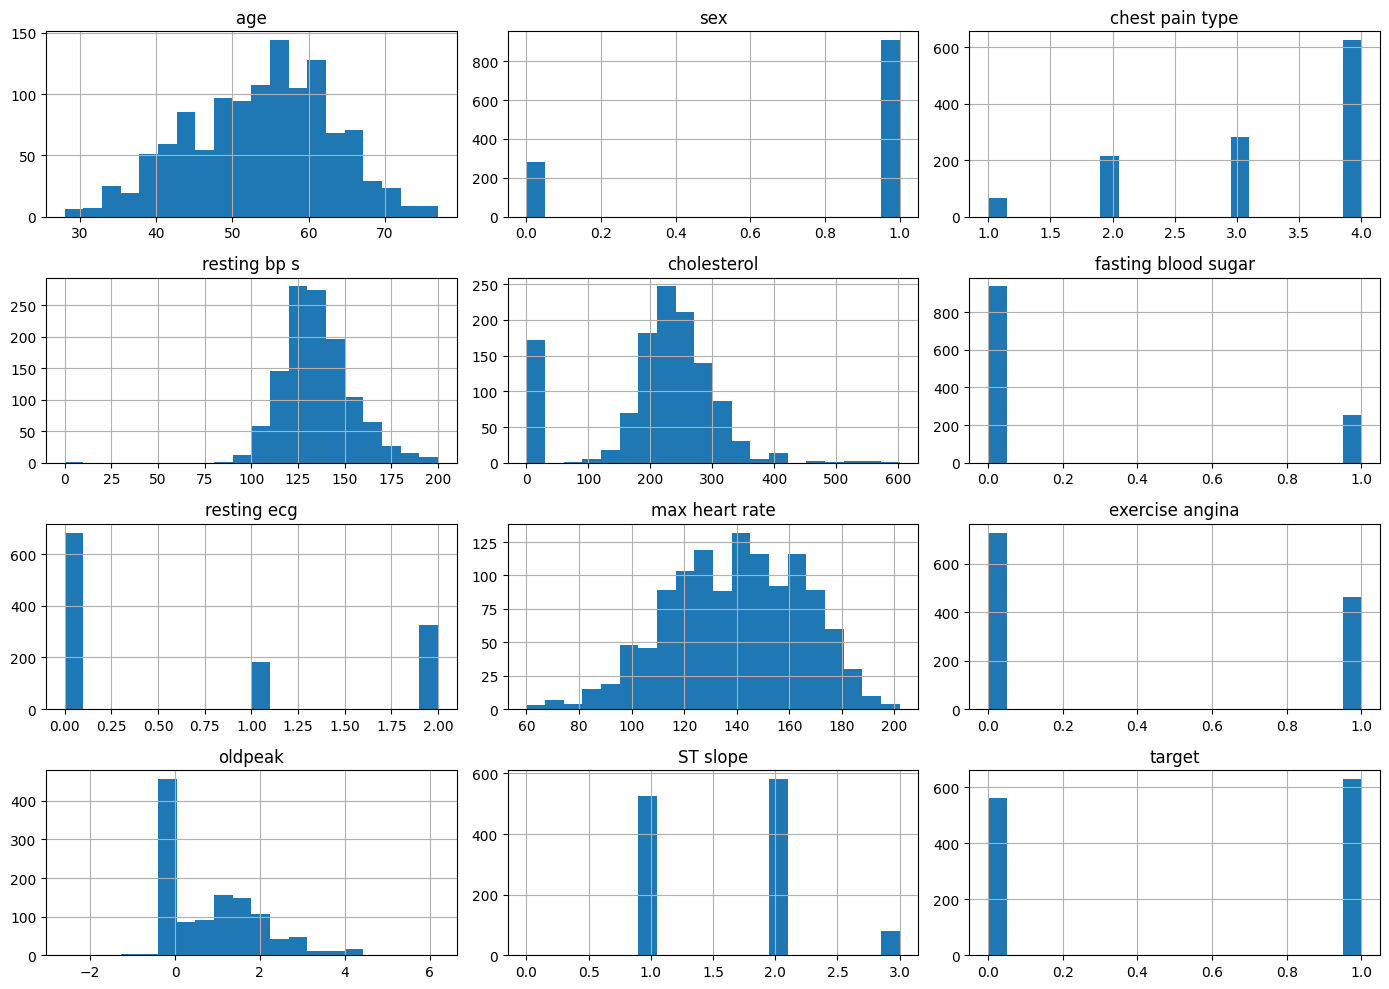

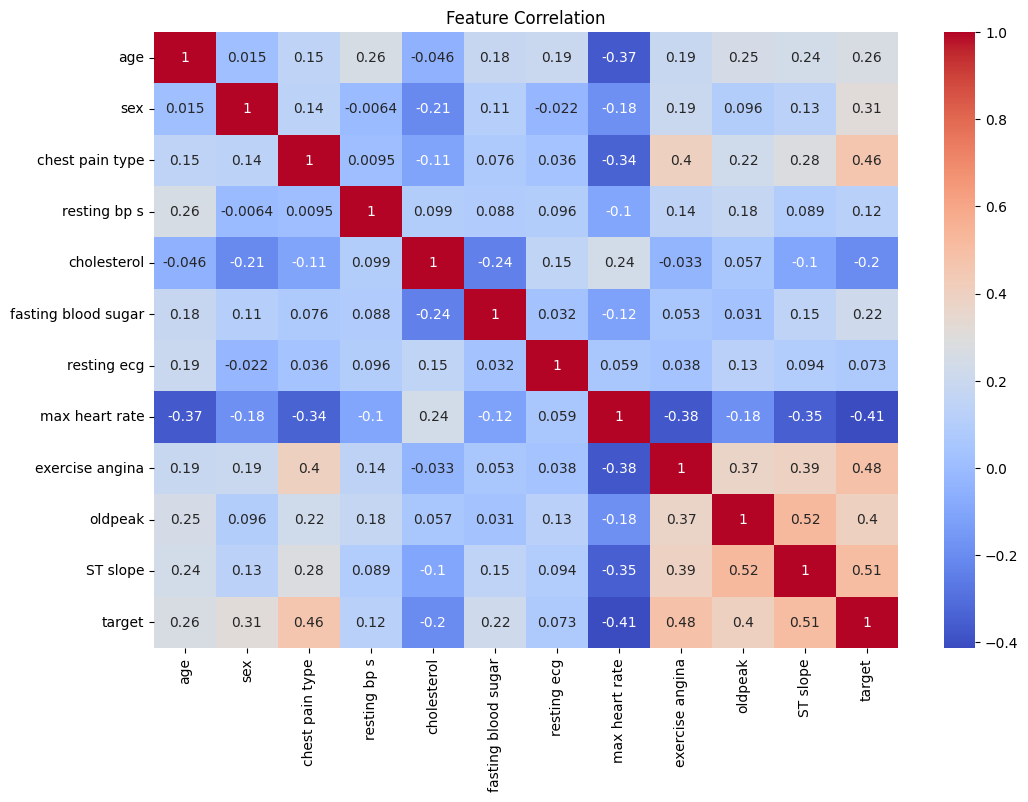

In [3]:
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution plots
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [7]:
print(df.columns.tolist())


['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [ ]:
categorical = ['age','sex', 'chest pain type','resting bp s','cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']
df[categorical] = df[categorical].astype('category')


df = pd.get_dummies(df, columns=categorical, drop_first=True)


X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    
    safe_name = name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(model, safe_name)
    print(f"✅ Saved model as {safe_name}")


Logistic Regression Accuracy: 0.8403
✅ Saved model as logistic_regression.pkl
Random Forest Accuracy: 0.9412
✅ Saved model as random_forest.pkl
SVM Accuracy: 0.8529
✅ Saved model as svm.pkl
XGBoost Accuracy: 0.9118
✅ Saved model as xgboost.pkl


d:\sem8\Projects\heart_disease\Heart Disease\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:34:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 Model: Logistic Regression
Accuracy: 0.8403361344537815
Precision: 0.872
Recall: 0.8320610687022901
F1 Score: 0.8515625
ROC AUC Score: 0.8966255261468217

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.87      0.83      0.85       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



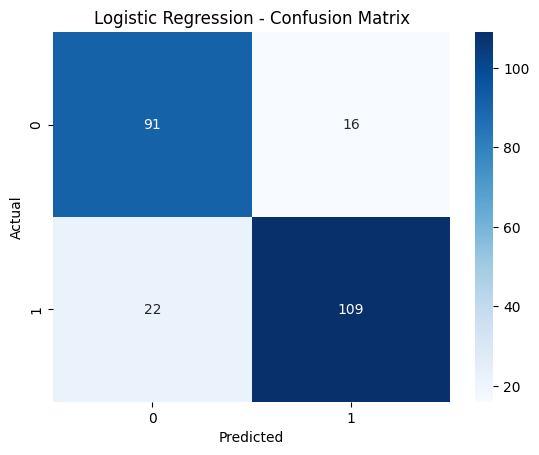

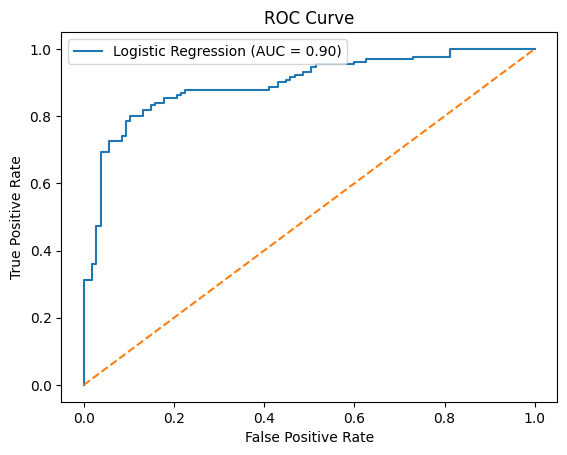


📌 Model: Random Forest
Accuracy: 0.9411764705882353
Precision: 0.9465648854961832
Recall: 0.9465648854961832
F1 Score: 0.9465648854961832
ROC AUC Score: 0.9602268673753298

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.95      0.95      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



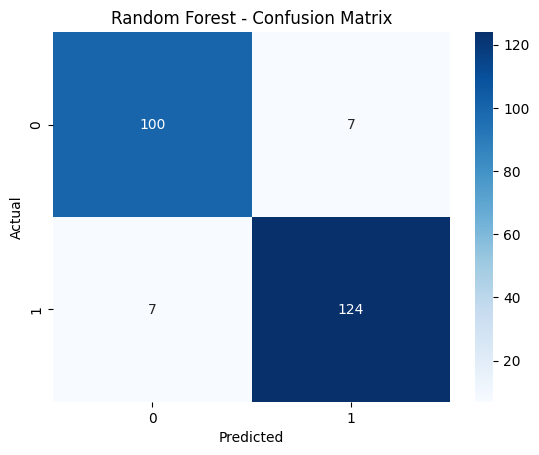

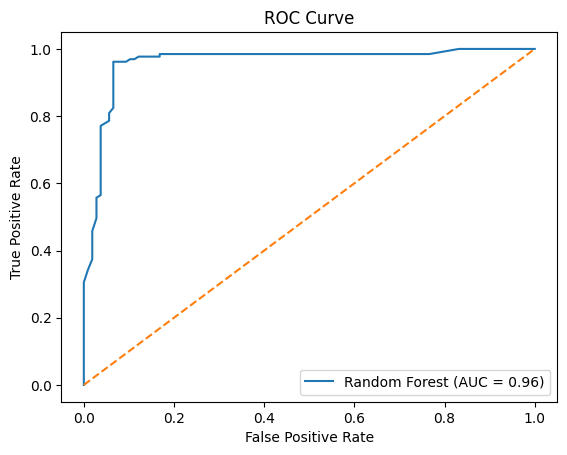


📌 Model: SVM
Accuracy: 0.8529411764705882
Precision: 0.8692307692307693
Recall: 0.8625954198473282
F1 Score: 0.8659003831417624
ROC AUC Score: 0.9297281872012556

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



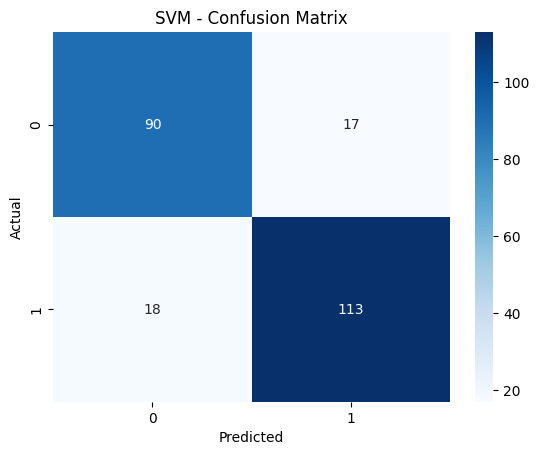

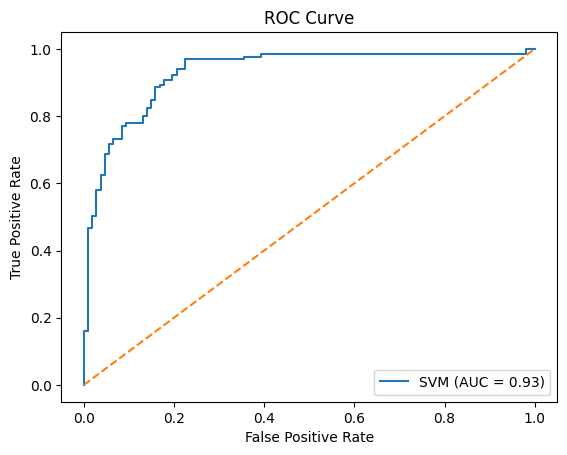


📌 Model: XGBoost
Accuracy: 0.9117647058823529
Precision: 0.9230769230769231
Recall: 0.916030534351145
F1 Score: 0.9195402298850575
ROC AUC Score: 0.9538417635728045

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       107
           1       0.92      0.92      0.92       131

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



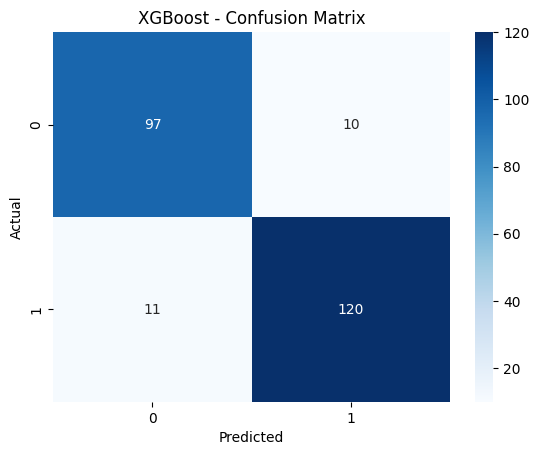

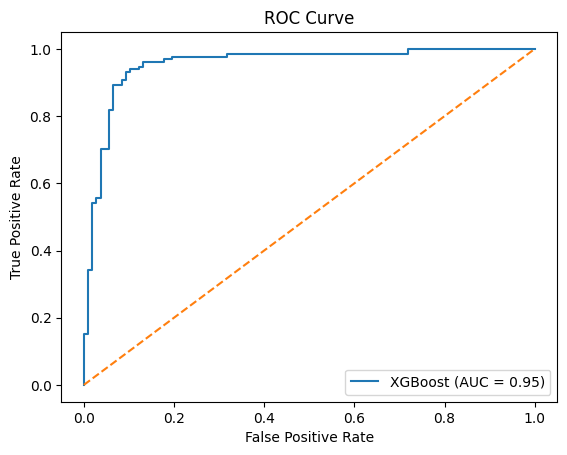

In [12]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n📌 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
saved_models = {
    "Logistic Regression": "logistic_regression.pkl",
    "Random Forest": "random_forest.pkl",
    "SVM": "svm.pkl",
    "XGBoost": "xgboost.pkl"
}

for name, file in saved_models.items():
    model = joblib.load(file)
    evaluate_model(name, model, X_test, y_test)
